In [1]:
import os
import librosa
import pandas as pd
import matplotlib.pyplot as plt

Percorso dataset

In [2]:
dataset_root = 'C://underwater-classification//dataset//Target'

Carica il file audio utilizzando librosa
Estrarre le informazioni richieste: 
1. Ampiezza massima assoluta del segnale
2. Durata del segnale in secondi
3. Numero di canali (mono o stereo)
4. Frequenza di campionamento
5. Fase del segnale (primo campione)


In [3]:
def extract_audio_features(dataset_root):
    audio_features = []

    durations = []
    frequencies = []
    amplitudes = []
    num_channels_list = []
    phases = []

    for root, dirs, files in os.walk(dataset_root):
        for filename in files:
            if filename.endswith(('.wav', '.mp3')):  
                file_path = os.path.join(root, filename)

                try:
                    y, sr = librosa.load(file_path, sr=None)

                    amplitude = max(abs(y))
                    duration = librosa.get_duration(y=y, sr=sr)  
                    num_channels = 1 if y.ndim == 1 else y.shape[1] 
                    frequency = sr
                    phase = y[0]

                    amplitudes.append(amplitude)
                    durations.append(duration)
                    frequencies.append(frequency)
                    num_channels_list.append(num_channels)
                    phases.append(phase)

                    file_name = os.path.splitext(filename)[0]

                    audio_features.append({
                        'Nome file': file_name,
                        'Path del file': file_path,
                        'Ampiezza del segnale': amplitude,
                        'Durata': duration,
                        'Frequenza': frequency,
                        'Numero di canali': num_channels,
                        'Fase': phase,
                        'Forma d\'onda': y.shape
                    })

                except Exception as e:
                    print(f"Errore durante l'elaborazione del file '{filename}': {e}")

    return audio_features, amplitudes, durations, frequencies, num_channels_list, phases


Funzione per salvare i dati in un file CSV

In [4]:
def save_to_csv(data, output_file):
    df = pd.DataFrame(data)
    df.to_csv(output_file, index=False)

Funzione per creare grafici di distribuzione utilizzando matplotlib

In [5]:
def plot_distribution(values, title):
    plt.figure(figsize=(8, 6))
    plt.hist(values, bins=20, color='skyblue', edgecolor='black')
    plt.title(title)
    plt.xlabel('Valore')
    plt.ylabel('Frequenza')
    plt.grid(True)
    plt.show()

MAIN

In [6]:
if __name__ == "__main__":
    dataset_root = 'C://underwater-classification//dataset//Target'

Estarre le informazioni audio dal dataset

In [7]:
    extracted_features, amplitudes, durations, frequencies, num_channels_list, phases = extract_audio_features(dataset_root)

Specificare il percorso per salvare il file CSV di output

In [8]:
    output_csv_file = 'audio_features_dataset.csv'

Salvare le informazioni estratte in un file CSV

In [9]:
    save_to_csv(extracted_features, output_csv_file)

Generare i grafici di distribuzione per ciascuna caratteristica

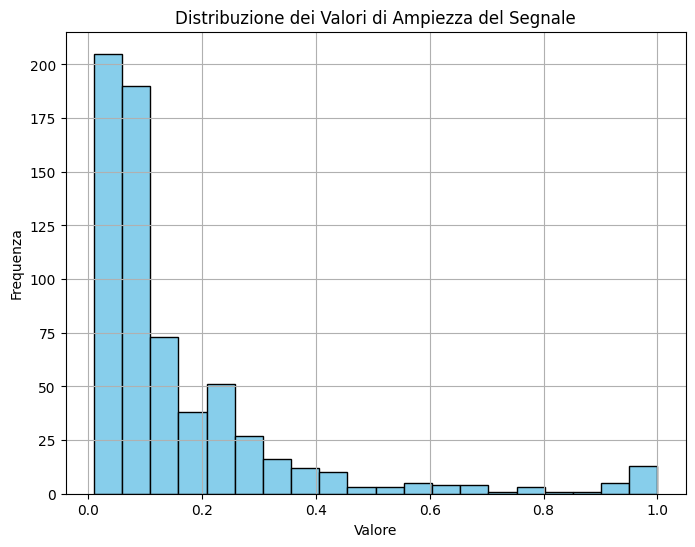

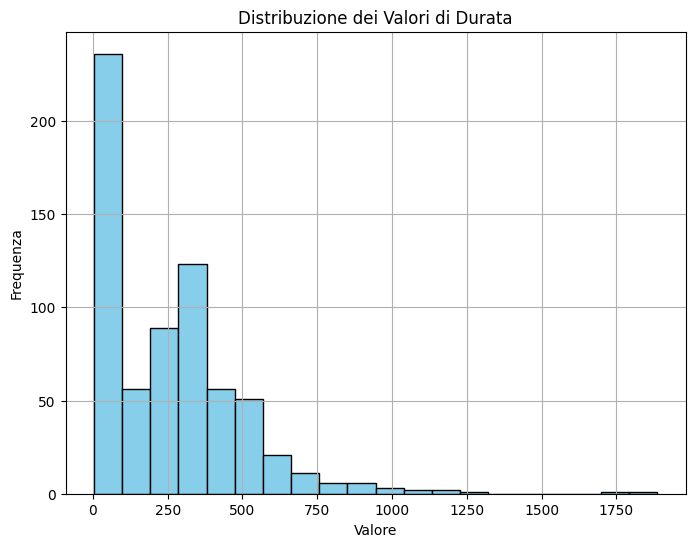

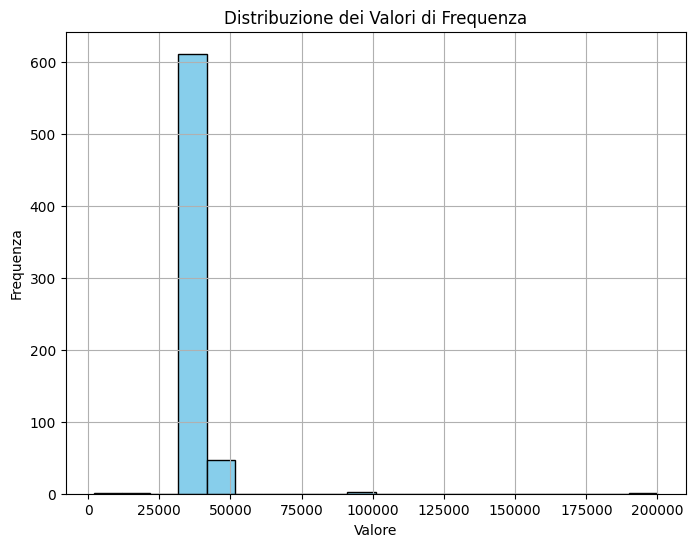

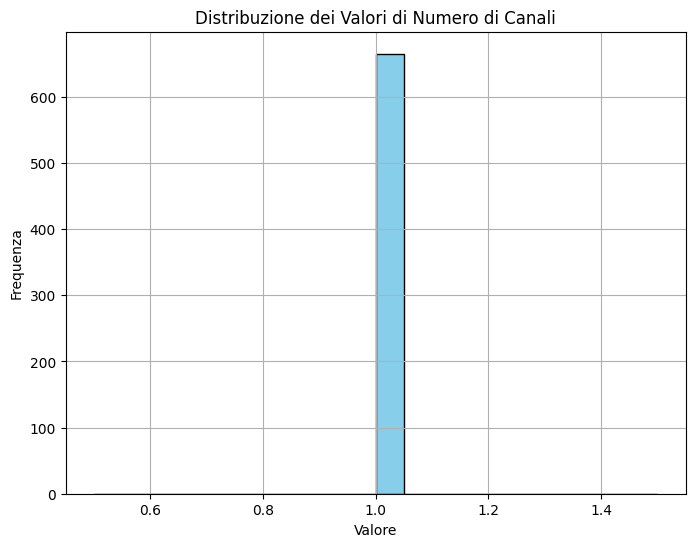

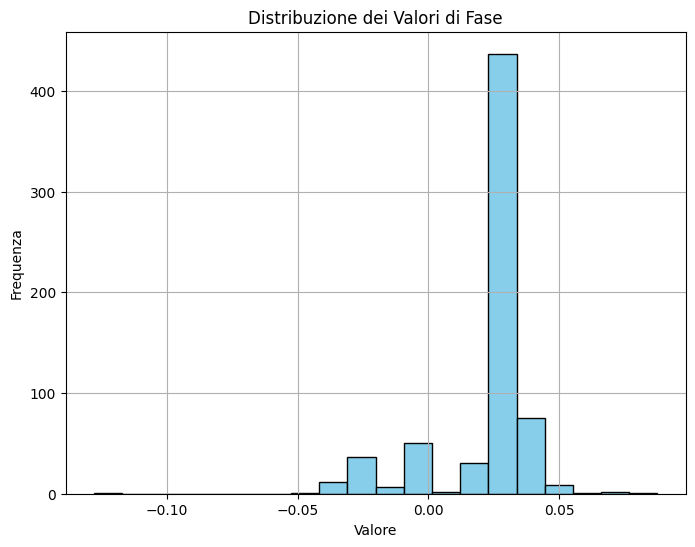

Il file CSV 'audio_features_dataset.csv' e' stato creato con successo.


In [10]:
    plot_distribution(amplitudes, 'Distribuzione dei Valori di Ampiezza del Segnale')
    plot_distribution(durations, 'Distribuzione dei Valori di Durata')
    plot_distribution(frequencies, 'Distribuzione dei Valori di Frequenza')
    plot_distribution(num_channels_list, 'Distribuzione dei Valori di Numero di Canali')
    plot_distribution(phases, 'Distribuzione dei Valori di Fase')

    print(f"Il file CSV '{output_csv_file}' e' stato creato con successo.")